#  Analysis of Titanic Passenger Data

This study is an excersize to show how to use foundations of Data Science in order to import, study, visualize, and present the raw data in a method that is easy for any user to digest and understand.

This study uses passenger data from the ill-fated maiden voyage of the RMS Titanic (1912). The data (and explanation of the data) can be obtained from: https://www.kaggle.com/c/titanic/data

First, the raw comma separated values (.cvs) data will be loaded into a Python (Pandas) dataframe.

Second, there will be some data exploration. This will be completed mostly by loading plots of different data slices in order to better understand the data with visualization.  Visualizing the data makes generating a hypothesis easier.

Third, the data will be analyzed.

Lastly, a function has been created where a user can input their personal information to see their chances of surviving the Titanic disaster.

**Note:** This is a Jupyter iPython Notebook. It allows code to be written, code output to be displayed, and also markup. It allows the analysis to be conducted and displayed. Comments that are intended for a general audience are presented in markup 'plain' text below each code segment. Comments that have to do with how the code works are above the code with a leading hashtag(#). However, due to the heavy display of Python code; it is not suitable for all audiencees. For example, if I were presenting my analysis to upper management, board of directors, a general audience, etc. I would not use this Notebook. I'd have much of the output in a PowerPoint type presentation. However, I would have the Jupyter Notebook available as a supplement, in case anyone wanted to see the code. Or, more importantly, the amount of work it took to create the pretty graphics.

## Loading and Inspecting the Titanic Data

In [1]:
# Import modules used in the analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# The following code reads all the Titanic data into Pandas DataFrames
# The explanation of the data can be found:
# https://www.kaggle.com/c/titanic/data
titanic_df = pd.read_csv('titanic-data.csv')

In [3]:
# Return shape to see how much data is being worked with
titanic_df.shape

(891, 12)

In [4]:
# Show counts and data types for all columns
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The first thing that caught my eye when running the .info function is that not every passenger has a value for cabin and age. The amount of info for cabins is pretty low. So, it is probably not worth the effort to try and run much analysis on how a cabin correlates to survivalship. Also, not every passenger has an age.

One thing that the .shape and .describe functions above indicate is that there are only 891 passengers in this dataset. According to the Wikipedia article on the titanic, the capacity figures are as follows:

Passengers: 2,435 | Crew: 892 | Total: 3,327 (or 3,547 according to other sources)

So, it looks like the dataset is not complete. Perhaps it is a sample, perhaps it is incomplete. We are not sure, but we will continue on.

In [5]:
# Drop all passengers with no Age recorded. Removing the comment hashtags to do so
# titanic_df = titanic_df.dropna(subset=['Age'])
# len(titanic_df)

~~Above, a .dropna was performed on the 'Age' column so that way the data we look at all has Age and was tested by calling on the new length of the Titanic DataFrame. You can see  now the Titanic Dataframe now has 714 passengers. We saw further up that only 714 of the original DataFrame had a value the Age column, so we know this was performed properly.~~

_This was ultimately not implemented in the analysis, but the option to do so is there if you want to take the code and explore the data and implement your own findings._

In [6]:
# Inspect the data with .head
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


The .head function gives us a preview of the data without having to load the entire dataset. It shows all the 'columns' of data for each passenger 'row'. As we saw above, we know that there was both passengers and crew on the titanic. Since this dataset includes  a column for 'Pclass', 'Ticket',  'Fare', and 'Cabin'; we can assume that this dataset only includes true **passengers** of the Titanic. It does not include crew.

In [7]:
# Get some quick and dirty statistics with pd.describe
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The pd.describe function will give lots of information that will most likely be needed later. So we'll pd.describe across the dataset. Some of this information is basically jiberish because it makes no sense to have something like a mean of unique passenger IDs (all unique) or survivalship (boolean).

## Exploring the Data

### Age, Class, and Sex

In this section, we'll begin to see the data visualized. It's easier to comprehend large amoutns of data when they are visualized. I find that histograms can be good tool for data visualization when only looking at one or two different variables. However, when looking at multiple different variables at once (i.e. surviorship based on passenger class) akernel density plot is easier to comprehend. 

A kernel density plot is very similar to a histogram, although it smooths out the plot values. It's more the **peaks** and overall shape of the density plot that we are concentrated with. We're not so much worried about the density value (Y-axis). An advantage of kernel density plots over historgrams is that they're better at determing the **distribution shapee** because they're not affected by the number of bins used (a bin is each bar of a historgram). 

The disadvantage of a density plot is that the y-axis does not give the numerical values of what we are looking at. However, in this stage of the data analysis process we are looking for trends; not values. Sometimes looking at actual values can be distracting and could lead to  screwed analysis. For example, when looking at a sample size like this titanic data that only shows  891 passengers; trends are exactly what we are looking for. We can impliment the data analysis on the full data later on if we wanted.

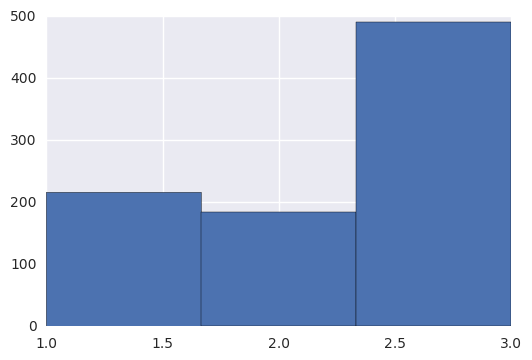

In [8]:
# Titanic passneger class distribution
titanic_df.Pclass.hist(bins=3)

Here you can see  a histogram of how many passengers were in each class. First class and second class had about the same number of people, however third class had more than double the amount of passengers than first or second class

First class list was a "who's who" of the rich and prominent of the upper class.

Second class' passengers were leisure tourists, academics, members of the clergy and middle class English and American families.

The third class (or steerage) passengers left hoping to start new lives in the United States and Canada.

Pclass
1    Axes(0.125,0.125;0.775x0.775)
2    Axes(0.125,0.125;0.775x0.775)
3    Axes(0.125,0.125;0.775x0.775)
Name: Age, dtype: object

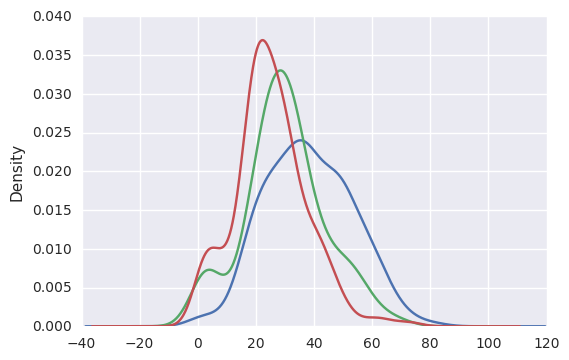

In [9]:
# Passenger age distrbution of passenger class
titanic_df.groupby('Pclass').Age.plot(kind='density')

Pclass
1    Axes(0.125,0.125;0.775x0.775)
2    Axes(0.125,0.125;0.775x0.775)
3    Axes(0.125,0.125;0.775x0.775)
Name: Age, dtype: object

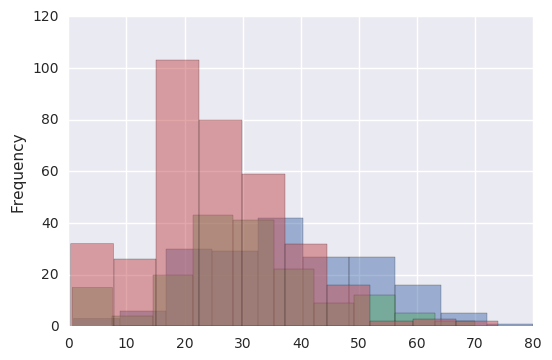

In [10]:
titanic_df.groupby('Pclass').Age.plot(kind='hist', alpha=0.5)

This charts above shows the density of passenger age in all three classes, followed by a histogram showing the same. First class (blue) is the 'oldest' cohort. Second class (green) is in the middle of age density. Third class (red) is the youngest cohort. 

This is an example that shows why, often times, a density plot is easier to comprehend as compared to a histogram. 

Sex
female    Axes(0.125,0.125;0.775x0.775)
male      Axes(0.125,0.125;0.775x0.775)
Name: Pclass, dtype: object

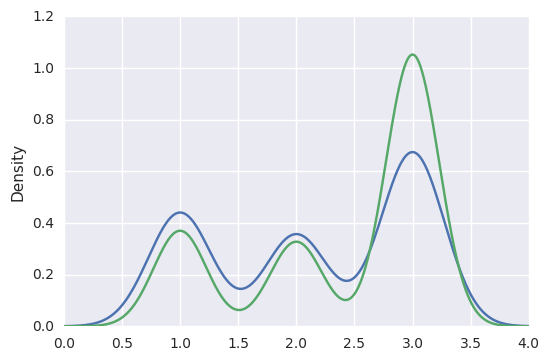

In [11]:
# This shows the distribution of males and females in the passenger classes
titanic_df.groupby('Sex').Pclass.plot(kind='density')

The plot above shows the density of females (blue) and males (gren) in the different passenger classes. The amount of males and females is nearly the same on first and second class. However, third class has many more males than females. Since third class passengers were mostly immigrants searching for a new life, it would make sense that there could be more 'single men' off to America to start a new life.

Sex
female    Axes(0.125,0.125;0.775x0.775)
male      Axes(0.125,0.125;0.775x0.775)
Name: Age, dtype: object

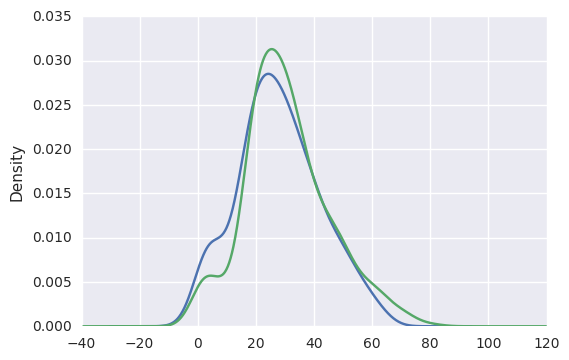

In [12]:
# Passenger age distrbution of both sexes
titanic_df.groupby('Sex').Age.plot(kind='density')

This shows the density of ages between males and females  when looking at all passengers.

In [13]:
# Mean of all Titanic passengers
titanic_df['Age'].mean()

29.69911764705882

### Survivalship

In this section, survialship will be presented  across a the factors of age, class, and sex.

The survivalship data is presented as a value of either  0 (died) or 1 (survived)

Sex
female    Axes(0.125,0.125;0.775x0.775)
male      Axes(0.125,0.125;0.775x0.775)
Name: Survived, dtype: object

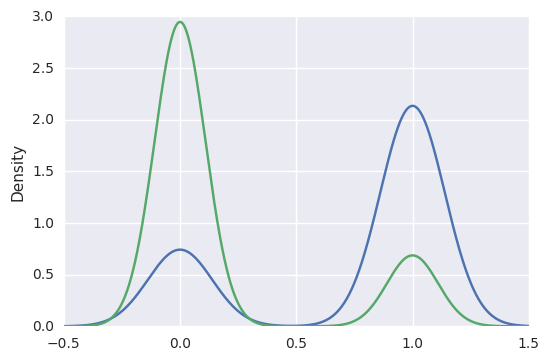

In [14]:
# This shows that females survived better than males
titanic_df.groupby('Sex').Survived.plot(kind='density')

The above plot shows females (in blue) had a **much** higher survivalship rates than males (in red).  They are nearly complete  opposites.

Pclass
1    Axes(0.125,0.125;0.775x0.775)
2    Axes(0.125,0.125;0.775x0.775)
3    Axes(0.125,0.125;0.775x0.775)
Name: Survived, dtype: object

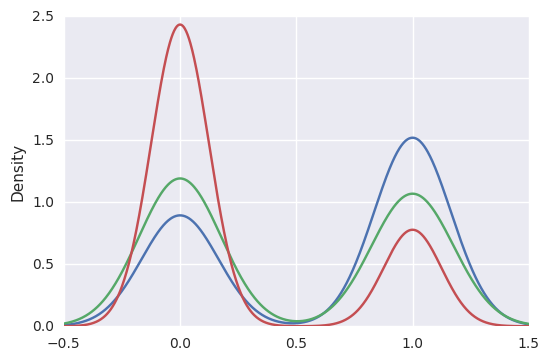

In [15]:
# This shows that survivalship based on passenger class
titanic_df.groupby('Pclass').Survived.plot(kind='density')

The plot above shows distribution of survivlship based on passenger class.  First class (blue) had the highest survivalship density, followed by second class (green), and third class (red). This could possibly be due to the much larger density of males in third class than females.

Survived
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: Age, dtype: object

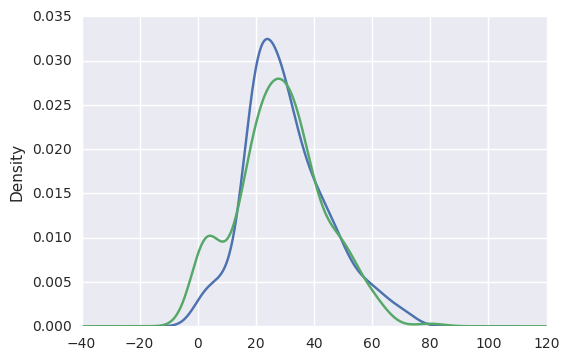

In [16]:
# This plot shows the survivalship based on age
titanic_df.groupby('Survived').Age.plot(kind='kde')

Survived
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: Age, dtype: object

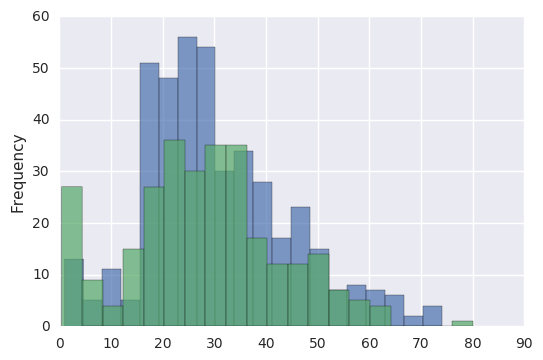

In [17]:
# This histogram shows the survivalship based on age
titanic_df.groupby('Survived').Age.plot(kind='hist', bins=20, alpha=0.7)

The density plot and histogram above show the  distribution of survivalship based on age. It appears young children had a decent chance of survival (green); regardless of age/class/sex. However, it seems to be pretty hit or miss, and  seems to really only show signifigance in younger children. Being that the definition of a 'child' and 'adult' is a bit subjective (evidense from Titanic survivors indicate that childness was relative to class), **and** not all of our data has ages, no concrete analysis will be completed regarding age. Passenger ages on the Titanic are fun to look at, but not necesarily have the ability for concrete analysis. Perhaps if all the passenger data included age, more analysis could be conducted. However, for the scope of this excersize analysis based on age will be ignored.

###  Hypthesis

It appears that the greatest chance of surviving the titanic  is dependent upon two main factors; sex and passenger class _(Pclass)_. Age also shows it could be a factor in survivalship, but only when age is simply child vs. adult. Also, as we saw far above in the .info function, not all passengers in the dataset have an Age. It would be quite convoluted and suspcious to make concrete  analysis based on a passenger property that is not complete. 

_Thus, it's good to be female or it's good to be rich. But  it's even better to be rich **and** female._

##  Data Analysis

In this section, the data will be more formally analyzed and the hyptheses will be tested. For much of this section, the data will be 'masked' to select values from the Titanic DataFrame. Think of a 'mask' more like SQL _select_ statements instead of normal Python conditional statements.Thus, when the data is masked, all the data can be viewed. This allows us to browse the data if we want. Importantly, this also allows a working variable to be created that we can call upon later. It's possible to put the mask inside the computations, but it's a little harder to read and we miss the opportunity to have a clean and simple variable to call on later. This is especially important if the scope of the study is not yet known, or if it is known the scope of the project will increase after the initial findings.

**NOTE:** As we saw above, the dataset is not complete. It is merely a sample set of the population of known Titanic data. Thus, any mention of concrete numbers like _total survived/died_ shall be avoided. Instead, results of the analysis will be presented in dimensionless numbers; i.e. percentage. Total data is computed in order to find percentages, but they are not printed. However, if a complete dataset is provided, a user could display these figures with little work.

### Masking Data

In [18]:
# Masking total survivors
# Below is an example of a mask
titanic_df[(titanic_df['Survived'] == 1) & (titanic_df['Sex'] == 'male') &
           (titanic_df['Age'] > 50) & (titanic_df['Pclass'] == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.50,C104,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.20,B41,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.00,A23,S
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.50,A26,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.55,E17,S


Above is an example of a 'mask'. Note that the Titanic DataFrame has isolated all first class passenger males over the age of 50 who survived. 

In [19]:
# Creating variables based on total survivorship
num_survive = len(titanic_df[titanic_df['Survived'] == 1])
num_victim = len(titanic_df[titanic_df['Survived'] == 0])
num_passengers = num_survive + num_victim
percent_survive = (float(num_survive) / float(num_passengers) * 100)
percent_victim = (float(num_victim) / float(num_passengers) * 100)
# Print total survivorship stats
print "The total number of passengers is:", num_passengers
print "The number of victims is:", num_victim
print "The number of survivors is:", num_survive
print "The percentage of total victims is:", percent_victim
print "The percentage of total survivors is:", percent_survive

The total number of passengers is: 891
The number of victims is: 549
The number of survivors is: 342
The percentage of total victims is: 61.6161616162
The percentage of total survivors is: 38.3838383838


In [20]:
# Creating variables based on total male survivorship
num_male_victim = len(titanic_df[(titanic_df['Survived'] == 0) & (titanic_df['Sex'] == 'male')])
num_male_survive = len(titanic_df[(titanic_df['Survived'] == 1) & (titanic_df['Sex'] == 'male')])
num_males = len(titanic_df[titanic_df['Sex'] == 'male'])
percent_male_victim = (float(num_male_victim) / float(num_males)) * 100
percent_male_survive = (float(num_male_survive) / float(num_males)) * 100
# Printing the total male survivorship stats
print "The total number of males is:", num_males
print "The number of male victims is:", num_male_victim
print "The number of male survivors is:", num_male_survive
print "The percentage of male victims is:", percent_male_victim
print "The percentage of male survivors is:", percent_male_survive

The total number of males is: 577
The number of male victims is: 468
The number of male survivors is: 109
The percentage of male victims is: 81.1091854419
The percentage of male survivors is: 18.8908145581


In [21]:
# Creating variables based on total female survivorship
num_female_victim = len(titanic_df[(titanic_df['Survived'] == 0) & (titanic_df['Sex'] == 'female')])
num_female_survive = len(titanic_df[(titanic_df['Survived'] == 1) & (titanic_df['Sex'] == 'female')])
num_females = len(titanic_df[titanic_df['Sex'] == 'female'])
percent_female_victim = (float(num_female_victim) / float(num_females)) * 100
percent_female_survive = (float(num_female_survive) / float(num_females)) * 100
# Printing the total male survivorship stats
print "The total number of females is:", num_females
print "The number of female victims is:", num_female_victim
print "The number of female survivors is:", num_female_survive
print "The percentage of female victims is:", percent_female_victim
print "The percentage of female survivors is:", percent_female_survive

The total number of females is: 314
The number of female victims is: 81
The number of female survivors is: 233
The percentage of female victims is: 25.7961783439
The percentage of female survivors is: 74.2038216561


In [22]:
# Creating variables based on first class passengers
num_pclass1_survive = len(titanic_df[(titanic_df['Survived'] == 1) & (titanic_df['Pclass'] == 1)])
num_pclass1_victim = len(titanic_df[(titanic_df['Survived'] == 0) & (titanic_df['Pclass'] == 1)])
num_pclass1 = len(titanic_df[titanic_df['Pclass'] == 1])
percent_pclass1_victim = (float(num_pclass1_victim) / float(num_pclass1)) * 100
percent_pclass1_survive = (float(num_pclass1_survive) / float(num_pclass1)) * 100
# Printing the total first class survivorship stats
print "The total number of first class passengers is:", num_pclass1
print "The number of first class victims is:", num_pclass1_victim
print "The number of first class survivors is:", num_pclass1_survive
print "The percentage of first class victims is:", percent_pclass1_victim
print "The percentage of first class survivors is:", percent_pclass1_survive

The total number of first class passengers is: 216
The number of first class victims is: 80
The number of first class survivors is: 136
The percentage of first class victims is: 37.037037037
The percentage of first class survivors is: 62.962962963


In [23]:
# Creating variables based on male first class passengers
num_pclass1_male_survive = len(titanic_df[(titanic_df['Survived'] == 1) &
                                          (titanic_df['Pclass'] == 1) & (titanic_df['Sex'] == 'male')])
num_pclass1_male_victim = len(titanic_df[(titanic_df['Survived'] == 0) &
                                         (titanic_df['Pclass'] == 1) & (titanic_df['Sex'] == 'male')])
num_pclass1_males = len(titanic_df[(titanic_df['Pclass'] == 1 & (titanic_df['Sex'] == 'male'))])
percent_pclass1_male_victim = (float(num_pclass1_male_victim) / float(num_pclass1_males)) * 100
percent_pclass1_male_survive = (float(num_pclass1_male_survive) / float(num_pclass1_males)) * 100
# Print male first class survivorship stats
print "The total number of first class male passengers is:", num_pclass1_males
print "The number of first class male victims is:", num_pclass1_male_victim
print "The number of first class survivors is:", num_pclass1_male_survive
print "The percentage of first class male victims is:", percent_pclass1_male_victim
print "The percentage of first class male survivors is:", percent_pclass1_male_survive

The total number of first class male passengers is: 122
The number of first class male victims is: 77
The number of first class survivors is: 45
The percentage of first class male victims is: 63.1147540984
The percentage of first class male survivors is: 36.8852459016


In [24]:
# Creating variables based on female first class passengers
num_pclass1_female_survive = len(titanic_df[(titanic_df['Survived'] == 1) &
                                            (titanic_df['Pclass'] == 1) & (titanic_df['Sex'] == 'female')])
num_pclass1_female_victim = len(titanic_df[(titanic_df['Survived'] == 0) &
                                           (titanic_df['Pclass'] == 1) & (titanic_df['Sex'] == 'female')])
num_pclass1_females = len(titanic_df[(titanic_df['Pclass'] == 1 & (titanic_df['Sex'] == 'female'))])
percent_pclass1_female_victim = (float(num_pclass1_female_victim) / float(num_pclass1_females)) * 100
percent_pclass1_female_survive = (float(num_pclass1_female_survive) / float(num_pclass1_females)) * 100
# Print female first class survivorship stats
print "The total number of first class female passengers is:", num_pclass1_females
print "The number of first class female victims is:", num_pclass1_female_victim
print "The number of first class female survivors is:", num_pclass1_female_survive
print "The percentage of first class female victims is:", percent_pclass1_female_victim
print "The percentage of first class female survivors is:", percent_pclass1_female_survive

The total number of first class female passengers is: 94
The number of first class female victims is: 3
The number of first class female survivors is: 91
The percentage of first class female victims is: 3.1914893617
The percentage of first class female survivors is: 96.8085106383


In [25]:
# Creating variables based on second class passengers
num_pclass2_survive = len(titanic_df[(titanic_df['Survived'] == 1) & (titanic_df['Pclass'] == 2)])
num_pclass2_victim = len(titanic_df[(titanic_df['Survived'] == 0) & (titanic_df['Pclass'] == 2)])
num_pclass2 = len(titanic_df[titanic_df['Pclass'] == 2])
percent_pclass2_victim = (float(num_pclass2_victim) / float(num_pclass2)) * 100
percent_pclass2_survive = (float(num_pclass2_survive) / float(num_pclass2)) * 100
# Print second class survivorship stats
print "The total number of second class passengers is:", num_pclass2
print "The number of second class victims is:", num_pclass2_victim
print "The number of second class survivors is:", num_pclass2_survive
print "The percentage of second class victims is:", percent_pclass2_victim
print "The percentage of second class survivors is:", percent_pclass2_survive

The total number of second class passengers is: 184
The number of second class victims is: 97
The number of second class survivors is: 87
The percentage of second class victims is: 52.7173913043
The percentage of second class survivors is: 47.2826086957


In [26]:
# Creating variables based on male second class passengers
num_pclass2_male_survive = len(titanic_df[(titanic_df['Survived'] == 1) &
                                          (titanic_df['Pclass'] == 2) & (titanic_df['Sex'] == 'male')])
num_pclass2_male_victim = len(titanic_df[(titanic_df['Survived'] == 0) &
                                         (titanic_df['Pclass'] == 2) & (titanic_df['Sex'] == 'male')])
num_pclass2_males = len(titanic_df[(titanic_df['Pclass'] == 2) & (titanic_df['Sex'] == 'male')])
percent_pclass2_male_victim = (float(num_pclass2_male_victim) / float(num_pclass2_males)) * 100
percent_pclass2_male_survive = (float(num_pclass2_male_survive) / float(num_pclass2_males)) * 100
# Print male second class survivorship stats
print "The total number of second class male passengers is:", num_pclass2_males
print "The number of second class male victims is:", num_pclass2_male_victim
print "The number of second class survivors is:", num_pclass2_male_survive
print "The percentage of second class male victims is:", percent_pclass2_male_victim
print "The percentage of second class male survivors is:", percent_pclass2_male_survive

The total number of second class male passengers is: 108
The number of second class male victims is: 91
The number of second class survivors is: 17
The percentage of second class male victims is: 84.2592592593
The percentage of second class male survivors is: 15.7407407407


In [27]:
# Creating variables based on female second class passengers
num_pclass2_female_survive = len(titanic_df[(titanic_df['Survived'] == 1) &
                                            (titanic_df['Pclass'] == 2) & (titanic_df['Sex'] == 'female')])
num_pclass2_female_victim = len(titanic_df[(titanic_df['Survived'] == 0) &
                                           (titanic_df['Pclass'] == 2) & (titanic_df['Sex'] == 'female')])
num_pclass2_females = len(titanic_df[(titanic_df['Pclass'] == 2) & (titanic_df['Sex'] == 'female')])
percent_pclass2_female_victim = (float(num_pclass2_female_victim) / float(num_pclass2_females)) * 100
percent_pclass2_female_survive = (float(num_pclass2_female_survive) / float(num_pclass2_females)) * 100
# Print female first class survivorship stats
print "The total number of second class female passengers is:", num_pclass2_females
print "The number of second class female victims is:", num_pclass2_female_victim
print "The number of second class female survivors is:", num_pclass2_female_survive
print "The percentage of second class female victims is:", percent_pclass2_female_victim
print "The percentage of second class female survivors is:", percent_pclass2_female_survive

The total number of second class female passengers is: 76
The number of second class female victims is: 6
The number of second class female survivors is: 70
The percentage of second class female victims is: 7.89473684211
The percentage of second class female survivors is: 92.1052631579


In [28]:
# Creating cariables based on third class passengers
num_pclass3_survive = len(titanic_df[(titanic_df['Survived'] == 1) & (titanic_df['Pclass'] == 3)])
num_pclass3_victim = len(titanic_df[(titanic_df['Survived'] == 0) & (titanic_df['Pclass'] == 3)])
num_pclass3 = len(titanic_df[titanic_df['Pclass'] == 3])
percent_pclass3_victim = (float(num_pclass3_victim) / float(num_pclass3)) * 100
percent_pclass3_survive = (float(num_pclass3_survive) / float(num_pclass3)) * 100
# Print second class survivorship stats
print "The total number of third class passengers is:", num_pclass3
print "The number of third class victims is:", num_pclass3_victim
print "The number of third class survivors is:", num_pclass3_survive
print "The percentage of third class victims is:", percent_pclass3_victim
print "The percentage of third class survivors is:", percent_pclass3_survive

The total number of third class passengers is: 491
The number of third class victims is: 372
The number of third class survivors is: 119
The percentage of third class victims is: 75.7637474542
The percentage of third class survivors is: 24.2362525458


In [29]:
# Creating variables based on male third class passengers
num_pclass3_male_survive = len(titanic_df[(titanic_df['Survived'] == 1) &
                                          (titanic_df['Pclass'] == 3) & (titanic_df['Sex'] == 'male')])
num_pclass3_male_victim = len(titanic_df[(titanic_df['Survived'] == 0) &
                                         (titanic_df['Pclass'] == 3) & (titanic_df['Sex'] == 'male')])
num_pclass3_males = len(titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Sex'] == 'male')])
percent_pclass3_male_victim = (float(num_pclass3_male_victim) / float(num_pclass3_males)) * 100
percent_pclass3_male_survive = (float(num_pclass3_male_survive) / float(num_pclass3_males)) * 100
# Print male second class survivorship stats
print "The total number of third class male passengers is:", num_pclass3_males
print "The number of third class male victims is:", num_pclass3_male_victim
print "The number of third class survivors is:", num_pclass3_male_survive
print "The percentage of third class male victims is:", percent_pclass3_male_victim
print "The percentage of third class male survivors is:", percent_pclass3_male_survive

The total number of third class male passengers is: 347
The number of third class male victims is: 300
The number of third class survivors is: 47
The percentage of third class male victims is: 86.4553314121
The percentage of third class male survivors is: 13.5446685879


In [30]:
# Creating variables based on female third class passengers
num_pclass3_female_survive = len(titanic_df[(titanic_df['Survived'] == 1) &
                                            (titanic_df['Pclass'] == 3) & (titanic_df['Sex'] == 'female')])
num_pclass3_female_victim = len(titanic_df[(titanic_df['Survived'] == 0) &
                                           (titanic_df['Pclass'] == 3) & (titanic_df['Sex'] == 'female')])
num_pclass3_females = len(titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Sex'] == 'female')])
percent_pclass3_female_victim = (float(num_pclass3_female_victim) / float(num_pclass3_females)) * 100
percent_pclass3_female_survive = (float(num_pclass3_female_survive) / float(num_pclass3_females)) * 100
# Print female first class survivorship stats
print "The total number of third class female passengers is:", num_pclass3_females
print "The number of third class female victims is:", num_pclass3_female_victim
print "The number of third class female survivors is:", num_pclass3_female_survive
print "The percentage of third class female victims is:", percent_pclass3_female_victim
print "The percentage of third class female survivors is:", percent_pclass3_female_survive

The total number of third class female passengers is: 144
The number of third class female victims is: 72
The number of third class female survivors is: 72
The percentage of third class female victims is: 50.0
The percentage of third class female survivors is: 50.0


## Visualzing the Findings

### Total Survivalship

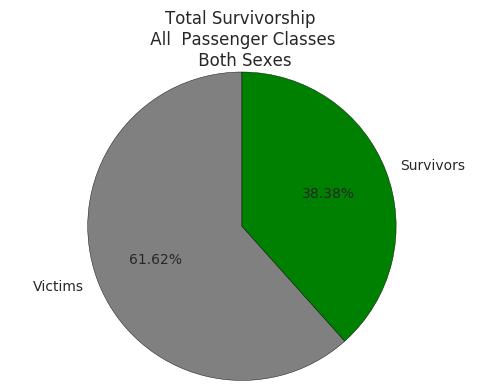

In [31]:
# Plot total survivorship

# Data
labels = 'Victims', 'Survivors'
sizes = [num_victim, num_survive]
colors = ['grey', 'green']

# Function to place values on each pie slice
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0)+0.5)
        return '{p:.2f}%'.format(p=pct,v=val)
    return my_autopct

# Plot
title('Total Survivorship \n All  Passenger Classes \n Both Sexes')
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=90)
plt.axis('equal')
plt.show()

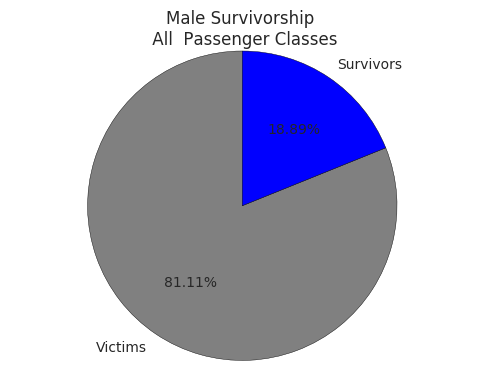

In [32]:
# Plot total male survivorship

# Data
labels = 'Victims', 'Survivors'
sizes = [num_male_victim, num_male_survive]
colors = ['grey', 'blue']

# Function to place values on each pie slice
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0)+0.5)
        return '{p:.2f}%'.format(p=pct,v=val)
    return my_autopct

# Plot
title('Male Survivorship \n All  Passenger Classes')
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=90)
plt.axis('equal')
plt.show()

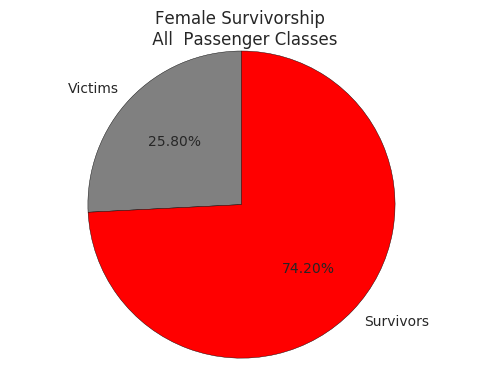

In [33]:
# Plot total female survivorship

# Data
labels = 'Victims', 'Survivors'
sizes = [num_female_victim, num_female_survive]
colors = ['grey', 'red']

# Function to place values on each pie slice
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0)+0.5)
        return '{p:.2f}%'.format(p=pct,v=val)
    return my_autopct

# Plot
title('Female Survivorship \n All  Passenger Classes')
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=90)
plt.axis('equal')
plt.show()

### First Class Passenger Survivalship

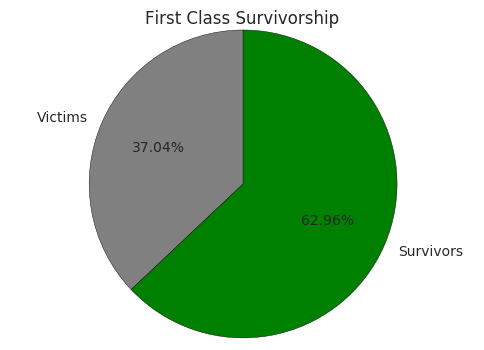

In [34]:
# Plot total first class survivorship

# Data
labels = 'Victims', 'Survivors'
sizes = [num_pclass1_victim, num_pclass1_survive]
colors = ['grey', 'green']

# Function to place values on each pie slice
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0)+0.5)
        return '{p:.2f}%'.format(p=pct,v=val)
    return my_autopct

# Plot
title('First Class Survivorship')
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=90)
plt.axis('equal')
plt.show()

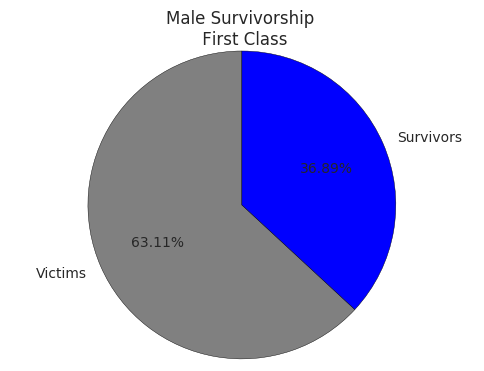

In [35]:
# Plot first class male survivorship

# Data
labels = 'Victims', 'Survivors'
sizes = [num_pclass1_male_victim, num_pclass1_male_survive]
colors = ['grey', 'blue']

# Function to place values on each pie slice
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0)+0.5)
        return '{p:.2f}%'.format(p=pct,v=val)
    return my_autopct

# Plot
title('Male Survivorship \n First Class')
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=90)
plt.axis('equal')
plt.show()

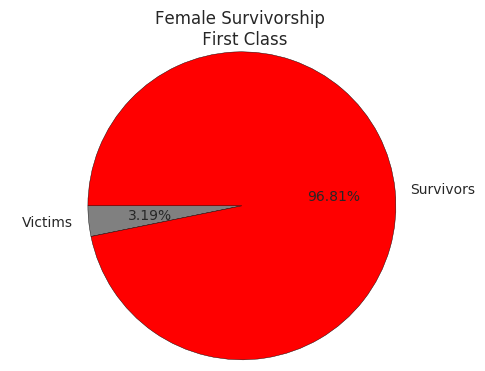

In [36]:
# Plot first class female survivorship

# Data
labels = 'Victims', 'Survivors'
sizes = [num_pclass1_female_victim, num_pclass1_female_survive]
colors = ['grey', 'red']

# Function to place values on each pie slice
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0)+0.5)
        return '{p:.2f}%'.format(p=pct,v=val)
    return my_autopct

# Plot
title('Female Survivorship \n First Class')
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=180)
plt.axis('equal')
plt.show()

### Second Class Passenger Survivalship

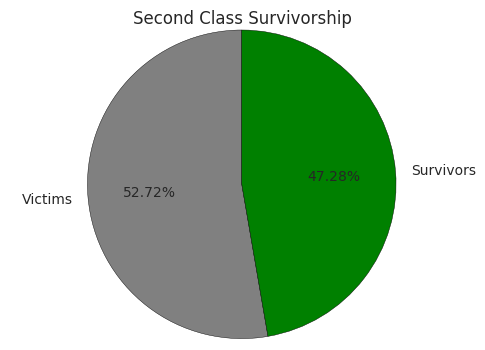

In [37]:
# Plot total second class survivorship

# Data
labels = 'Victims', 'Survivors'
sizes = [num_pclass2_victim, num_pclass2_survive]
colors = ['grey', 'green']

# Function to place values on each pie slice
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0)+0.5)
        return '{p:.2f}%'.format(p=pct,v=val)
    return my_autopct

# Plot
title('Second Class Survivorship')
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=90)
plt.axis('equal')
plt.show()

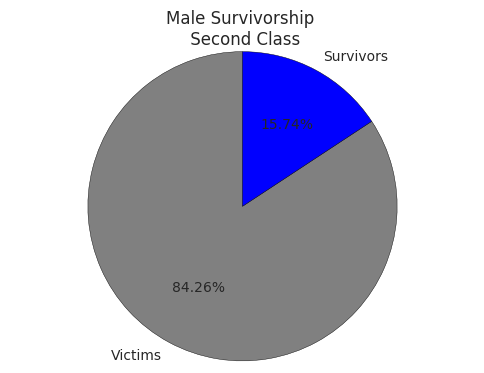

In [38]:
# Plot second class male survivorship

# Data
labels = 'Victims', 'Survivors'
sizes = [num_pclass2_male_victim, num_pclass2_male_survive]
colors = ['grey', 'blue']

# Function to place values on each pie slice
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0)+0.5)
        return '{p:.2f}%'.format(p=pct,v=val)
    return my_autopct

# Plot
title('Male Survivorship \n Second Class')
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=90)
plt.axis('equal')
plt.show()

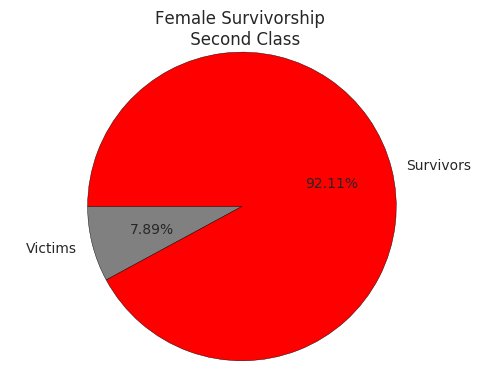

In [39]:
# Plot second class female survivorship

# Data
labels = 'Victims', 'Survivors'
sizes = [num_pclass2_female_victim, num_pclass2_female_survive]
colors = ['grey', 'red']

# Function to place values on each pie slice
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0)+0.5)
        return '{p:.2f}%'.format(p=pct,v=val)
    return my_autopct

# Plot
title('Female Survivorship \n Second Class')
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=180)
plt.axis('equal')
plt.show()

### Third Class Passenger Survivalship

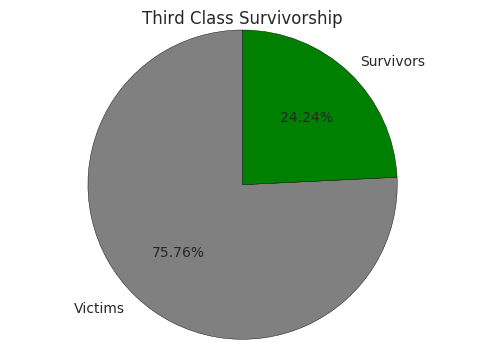

In [40]:
# Plot third third class survivorship

# Data
labels = 'Victims', 'Survivors'
sizes = [num_pclass3_victim, num_pclass3_survive]
colors = ['grey', 'green']

# Function to place values on each pie slice
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0)+0.5)
        return '{p:.2f}%'.format(p=pct,v=val)
    return my_autopct

# Plot
title('Third Class Survivorship')
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=90)
plt.axis('equal')
plt.show()

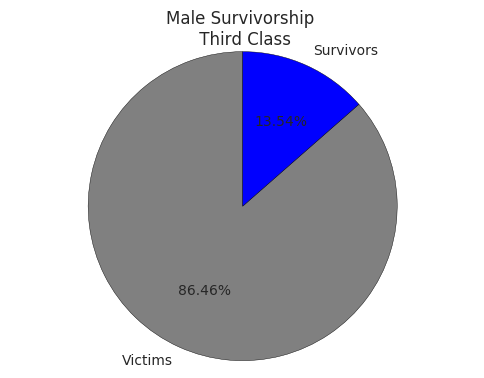

In [41]:
# Plot third class male survivorship

# Data
labels = 'Victims', 'Survivors'
sizes = [num_pclass3_male_victim, num_pclass3_male_survive]
colors = ['grey', 'blue']

# Function to place values on each pie slice
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0)+0.5)
        return '{p:.2f}%'.format(p=pct,v=val)
    return my_autopct

# Plot
title('Male Survivorship \n Third Class')
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=90)
plt.axis('equal')
plt.show()

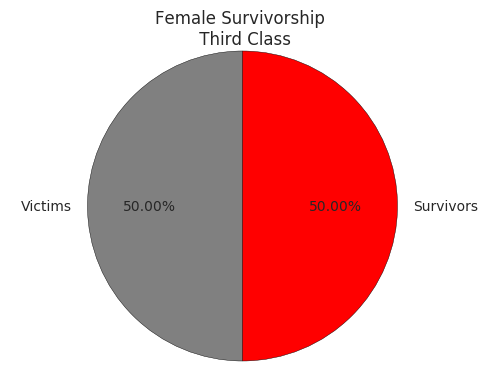

In [42]:
# Plot third class female survivorship

# Data
labels = 'Victims', 'Survivors'
sizes = [num_pclass3_female_victim, num_pclass3_female_survive]
colors = ['grey', 'red']

# Function to place values on each pie slice
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0)+0.5)
        return '{p:.2f}%'.format(p=pct,v=val)
    return my_autopct

# Plot
title('Female Survivorship \n Third Class')
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=90)
plt.axis('equal')
plt.show()

## Conclusions

The above data shows that chances of survival increases as the passenger class (fare) increases. Also within each class, females have a much higher chance of survival than males. 

## Your Personalized Survival Chances

In [43]:
# Build a function that passes user's sex and 'passenger class',
# takes those arguments are computes based on the stats found in the code
# and returns a 'chance of survival'.

In [44]:
def personalized_survival_chances(pclass, sex):
    if pclass == 1:
        if sex == 'male':
            return 'Your chance of surviving the Titanic disaster is:', percent_pclass1_male_survive
        else:
            return 'Your chance of surviving the Titanic disaster is:', percent_pclass1_female_survive
    elif pclass == 2:
        if sex == 'male':
            return 'Your chance of surviving the Titanic disaster is:', percent_pclass2_male_survive
        else:
            return 'Your chance of surviving the Titanic disaster is:', percent_pclass2_female_survive
    else:
        if sex == 'male':
            return 'Your chance of surviving the Titanic disaster is:', percent_pclass3_male_survive
        else:
            return 'Your chance of surviving the Titanic disaster is:', percent_pclass3_female_survive

The above function will pass the sex of a user and the passenger class ticket they would have purchased and reutrns their chance of survival.

In [45]:
# Test function
print personalized_survival_chances(1, 'male')
print personalized_survival_chances(1, 'female')
print personalized_survival_chances(2, 'male')
print personalized_survival_chances(2, 'female')
print personalized_survival_chances(3, 'male')
print personalized_survival_chances(3, 'female')

('Your chance of surviving the Titanic disaster is:', 36.885245901639344)
('Your chance of surviving the Titanic disaster is:', 96.80851063829788)
('Your chance of surviving the Titanic disaster is:', 15.74074074074074)
('Your chance of surviving the Titanic disaster is:', 92.10526315789474)
('Your chance of surviving the Titanic disaster is:', 13.544668587896252)
('Your chance of surviving the Titanic disaster is:', 50.0)


## Sources

https://matplotlib.org/1.5.3/index.html

https://pandas.pydata.org/pandas-docs/stable/

https://github.com/jp-wright/dating_data

https://github.com/zipfian/python-fundamentals

https://en.wikipedia.org/wiki/RMS_Titanic